# ***Arboles de decision - Decision Tree***

**Ejercicio Distribucion de Iris Dataset**

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 11

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etiquetas de las clases:', np.unique(y))

Etiquetas de las clases: [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)
tree_1.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, random_state=1)

<ipython-input-7-6762539d603b>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


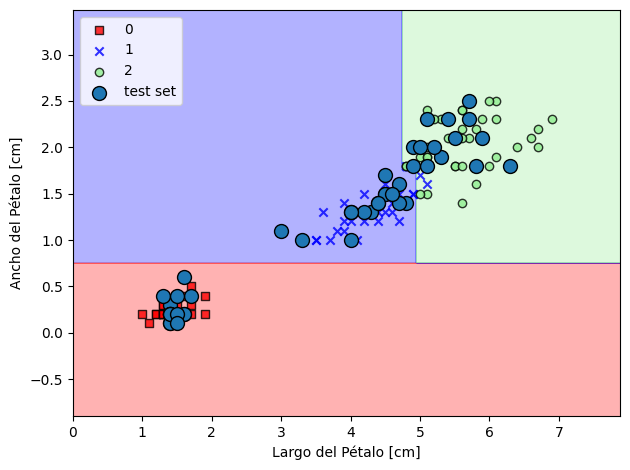

In [11]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=tree_1, test_idx=range(105, 150))

plt.xlabel('Largo del Pétalo [cm]')
plt.ylabel('Ancho del Pétalo [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
y_pred_1 = tree_1.predict(X_test)
y_pred_1

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [13]:
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
cm_tree_1= confusion_matrix(y_test, y_pred_1)

print(cm_tree_1)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


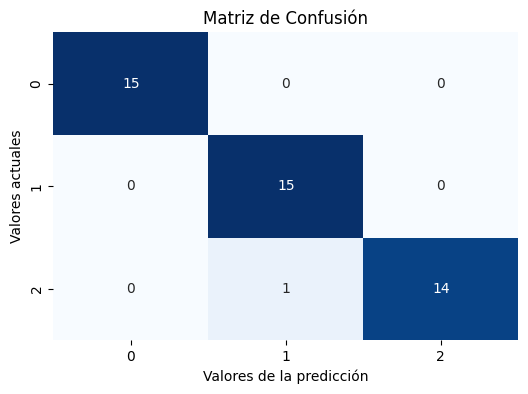

In [14]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print ("Accuracy / Exactitud es " +str(accuracy_score(y_test,y_pred_1)*100) + " %")

Accuracy / Exactitud es 97.77777777777777 %


In [17]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_1,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['Largo_Petalo',
                                          'Ancho_Petalo'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [25]:
from IPython.display import Image

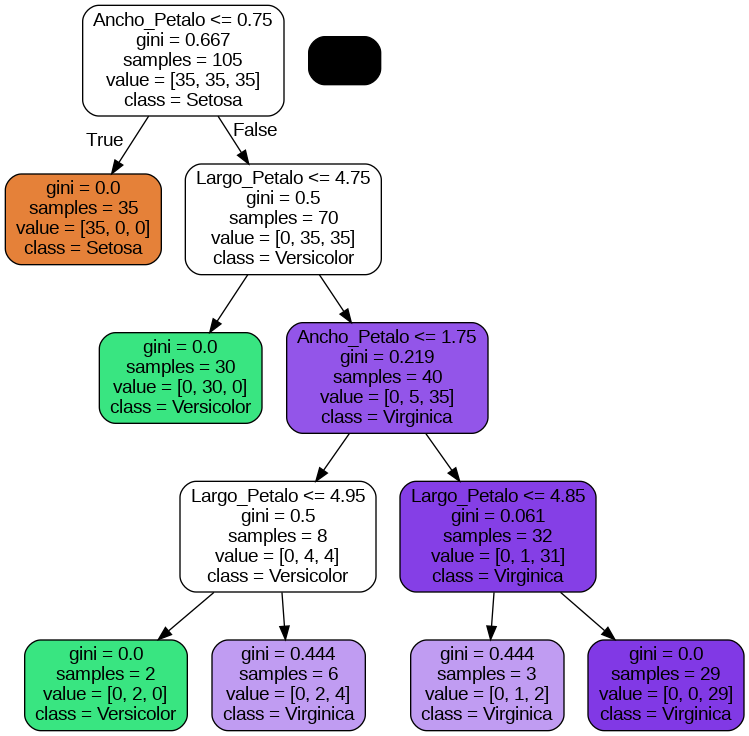

In [26]:
Image(filename='tree.png', width=600)

In [27]:
tree_2 = DecisionTreeClassifier(criterion='entropy',
                              max_depth=2,
                              random_state=1)
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

<ipython-input-7-6762539d603b>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


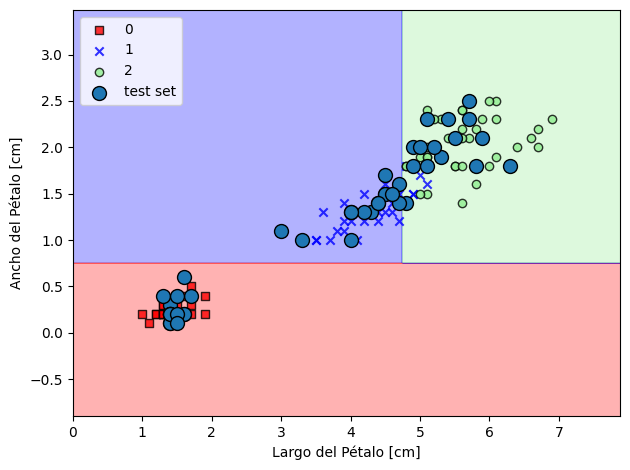

In [28]:
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_2, test_idx=range(105, 150))

plt.xlabel('Largo del Pétalo [cm]')
plt.ylabel('Ancho del Pétalo [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
y_pred_2 = tree_2.predict(X_test)
y_pred_2

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [30]:
# Calcula la matriz de confusión
cm_tree_2= confusion_matrix(y_test, y_pred_2)

print(cm_tree_2)

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


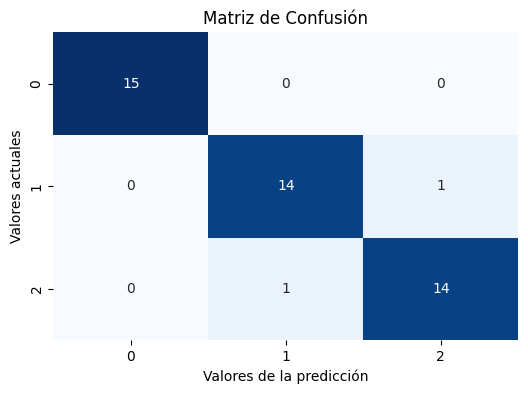

In [31]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [33]:
print ("Accuracy / Exactitud es " +str(accuracy_score(y_test,y_pred_2)*100) + " %")

Accuracy / Exactitud es 95.55555555555556 %


In [34]:
dot_data_2 = export_graphviz(tree_2,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['Largo_Petalo',
                                          'Ancho_Petalo'],
                           out_file=None)
graph = graph_from_dot_data(dot_data_2)
graph.write_png('tree_2.png')

True

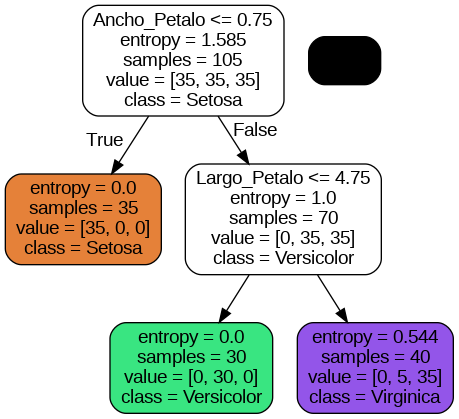

In [35]:
Image(filename='tree_2.png', width=600)

<ipython-input-7-6762539d603b>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


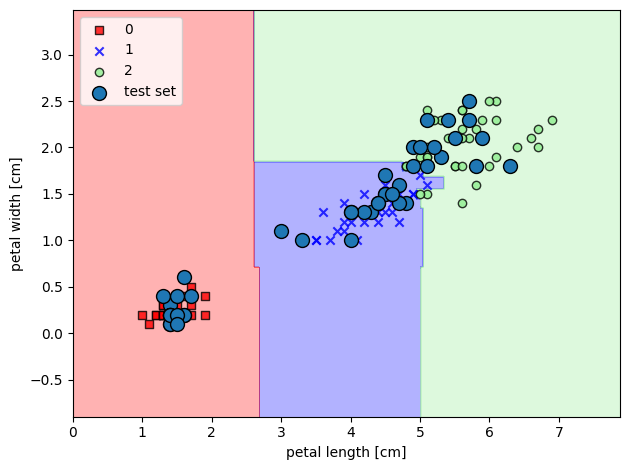

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()